### SAMPLE USAGE
#### 1) Read XML file

We Assume that we will have a **xml file** which we can read **first initial** state of the vehicles and 
**lanelet network** of way. We directly took this **reading** from tutorial session.

In [1]:
import os
import matplotlib.pyplot as plt
from IPython import display

# import functions to read xml file and visualize commonroad objects
from commonroad.common.file_reader import CommonRoadFileReader
from commonroad.visualization.draw_dispatch_cr import draw_object

# generate path of the file to be opened
#file_path = "data_files/ZAM_Tutorial-1_1_T-1.xml"
#file_path = "data_files/ZAM_Tjunction-1_66_T-1.xml"
file_path = "data_files/CHN_Cho-2_1_T-1.xml"
#file_path = "data_files/DEU_A9-1_1_T-1.xml"

# read in the scenario and planning problem set
crf = CommonRoadFileReader(file_path)
scenario, planning_problem_set = crf.open()

# plot the scenario for 40 time step, here each time step corresponds to 0.1 second
for i in range(0, 40):
    # uncomment to clear previous graph
    display.clear_output(wait=True)
    
    plt.figure(figsize=(20, 10))
    # plot the scenario at different time step
    draw_object(scenario, draw_params={'time_begin': i})
    # plot the planning problem set
    draw_object(planning_problem_set)
    plt.gca().set_aspect('equal')
    plt.show()
    


<Figure size 2000x1000 with 1 Axes>

#### 2) Create Graph

/home/melike/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/home/melike/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


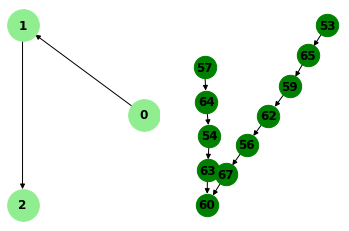

In [2]:
#distance
#lanelet_id
#adj_left=None, adj_left_same_direction=None, adj_right=None, ad_right_same_direction=None, 
#predecessor, succesor
#line_marking_right_vertices

########## Sample Usage CreateLaneletGraph ##########
##################################################
from GraphBasedDistanceMeasure import ScenarioGraph
import networkx as nx

options1 = {
    'node_color': 'lightgreen',
    'node_size': 1000,
    'width': 1,
}
options2 = {
    'node_color': 'green',
    'node_size': 500,
    'width': 1,
}

ScenarioGraph = ScenarioGraph(scenario, planning_problem_set)
G = ScenarioGraph.scenario_graph
lanelets = ScenarioGraph.lanelets
plt.subplot(121)
nx.draw_circular(G.nodes[lanelets[0].lanelet_id]['graph'], with_labels=True, font_weight='bold', **options1) #for reaching the graph of lanelet with id i
plt.subplot(122)
nx.draw_kamada_kawai(G,with_labels=True, font_weight='bold', **options2)
plt.show()

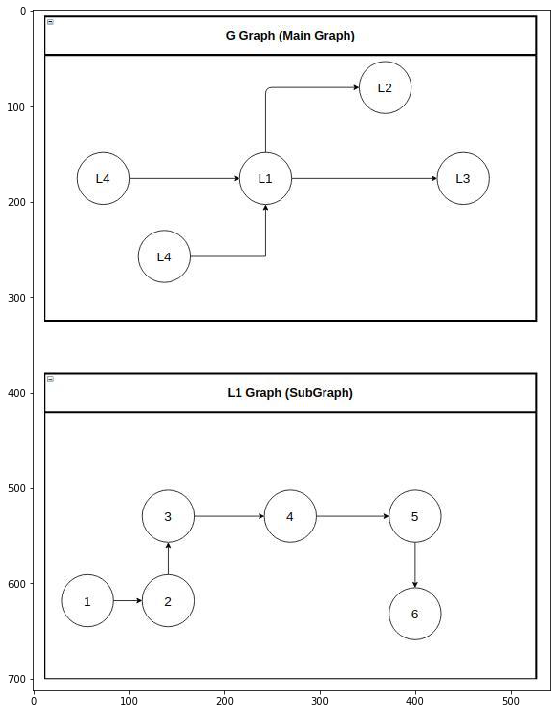

In [3]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
plt.rcParams['figure.figsize'] = (25.0, 12.5) # set default size of plots
img=mpimg.imread('SampleGraph.jpg')
imgplot = plt.imshow(img)
plt.show()


[53, 65, 54, 64, 63, 56, 62, 67, 57, 59, 60]


/home/melike/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/home/melike/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


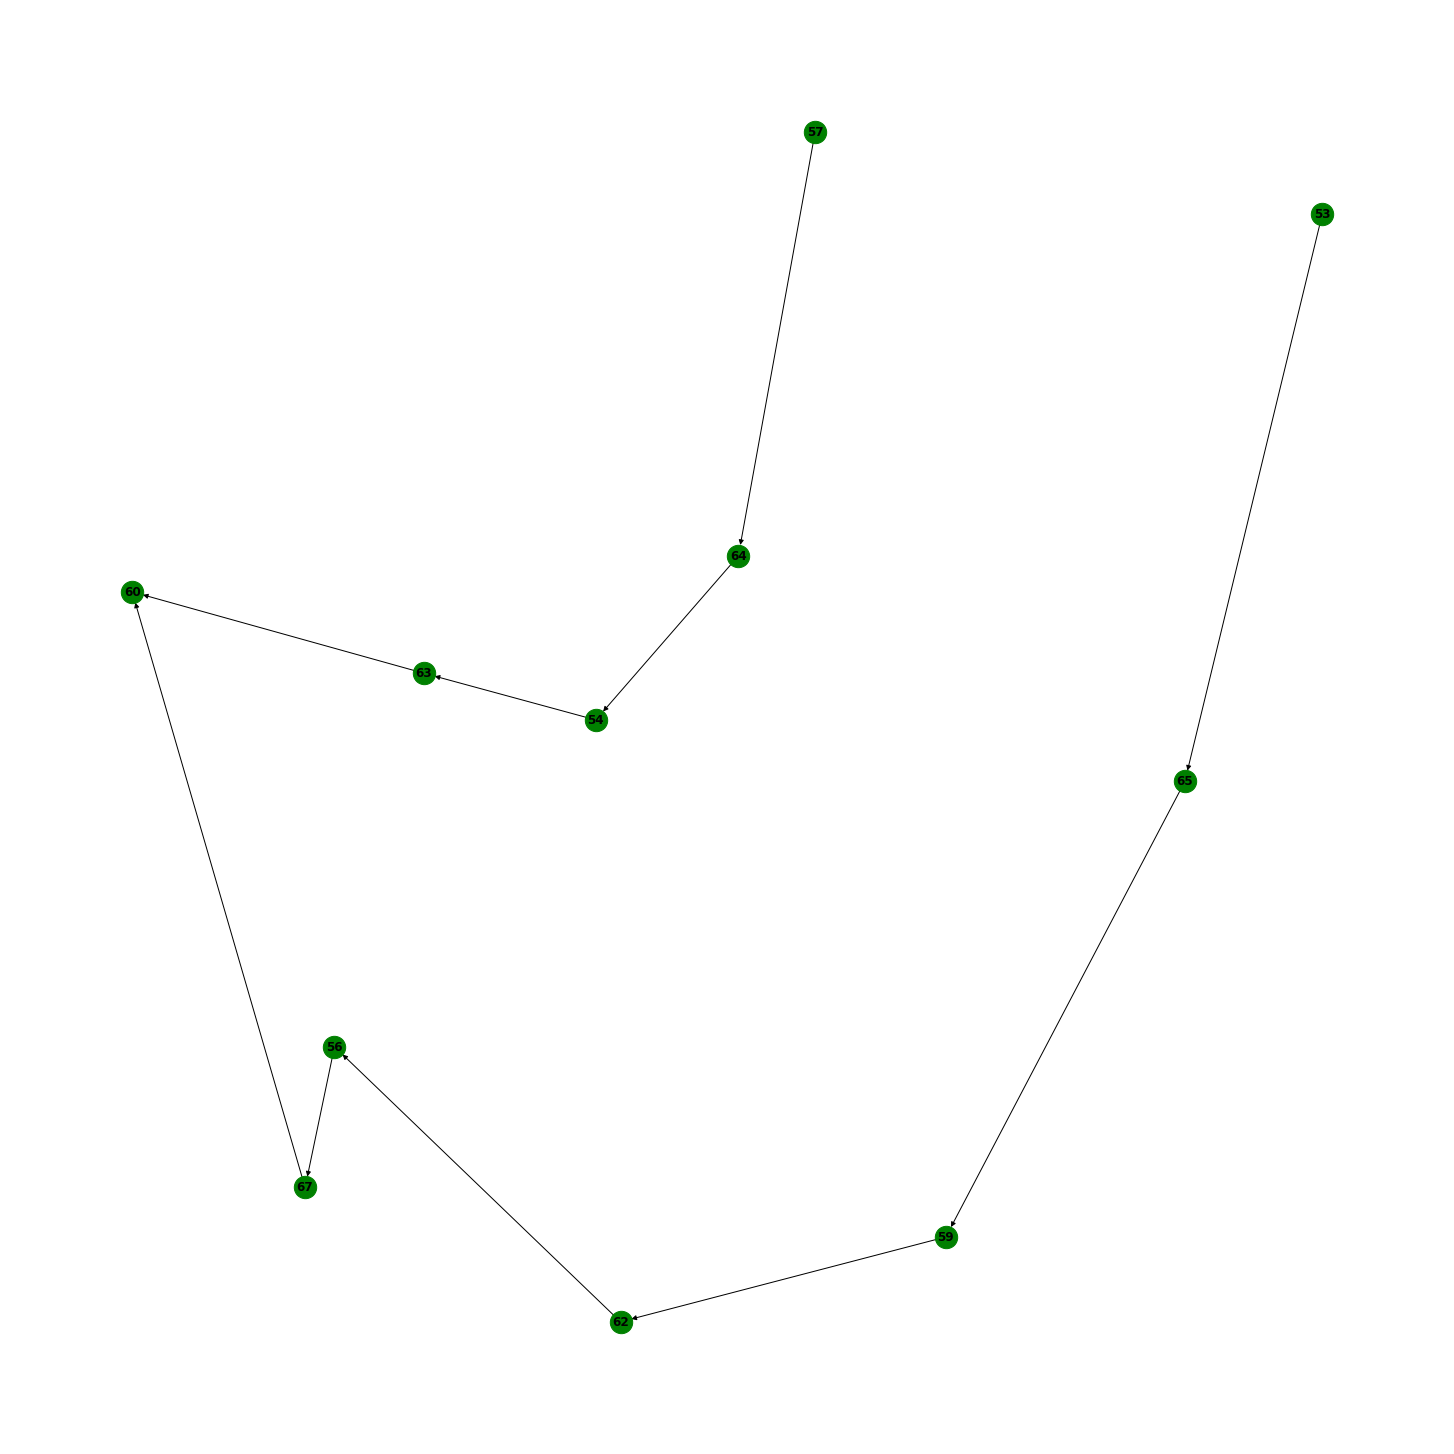

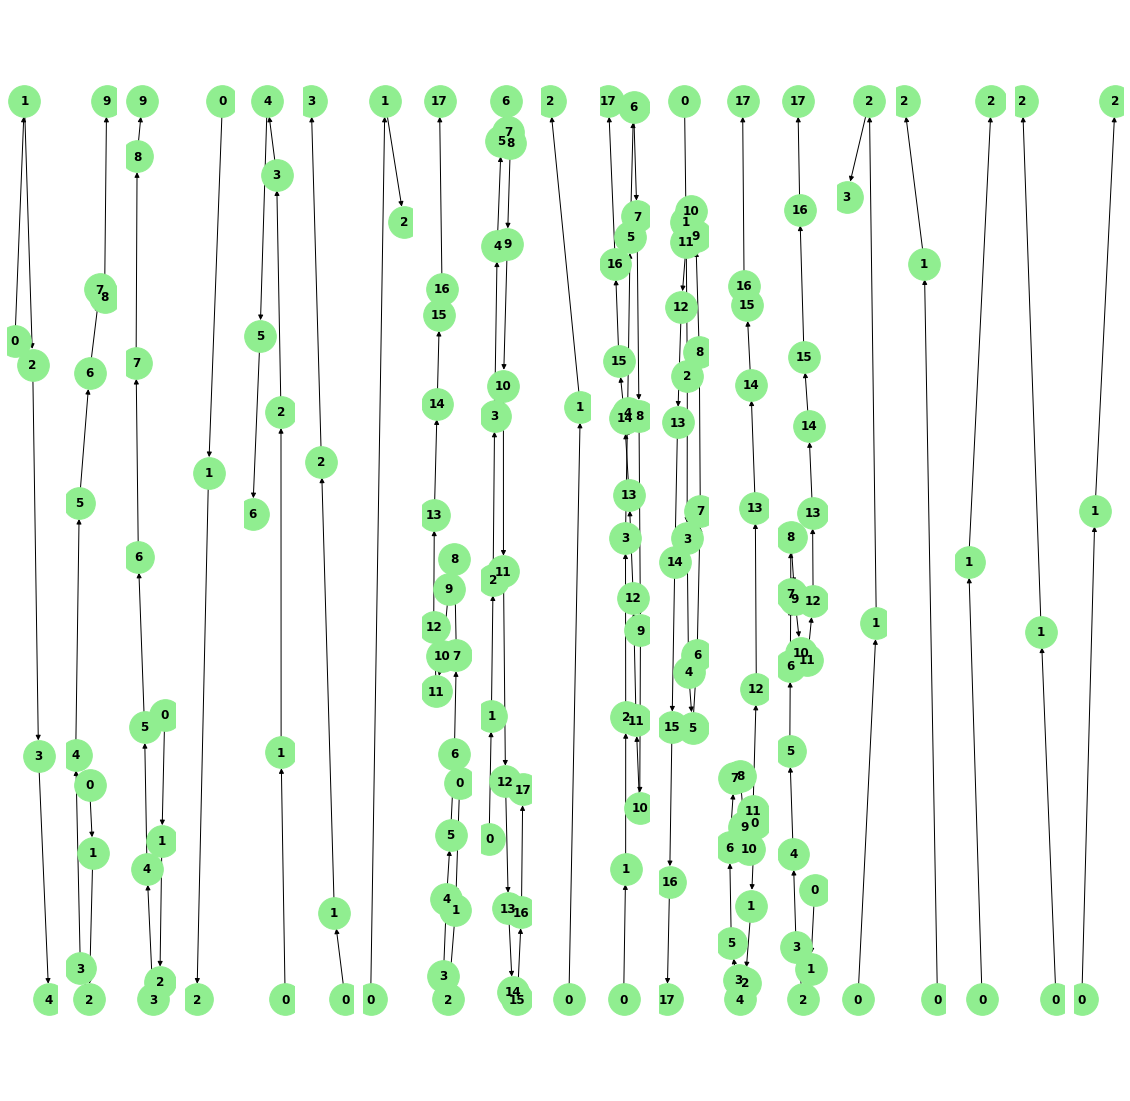

In [4]:
print(G.nodes)
plt.rcParams['figure.figsize'] = (20.0, 20.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'
nx.draw(G,with_labels=True, font_weight='bold', **options2)
plt.show()
i = 1
for o in scenario.obstacles:
    #print(lanelet)
    plt.subplot(1, len(scenario.obstacles), i)
    lanelet_of_obstacle, node = ScenarioGraph.V(o.obstacle_id)
    nx.draw(G.nodes[lanelet_of_obstacle]['graph'], with_labels=True, font_weight='bold', **options1) #for reaching the graph of lanelet with id i
    i = i+1
plt.show()

#### 3) Set Initial Vertex of the Given Vehicles ( v(c0)):

According to paper we have just **initial states** of the vehicles so we just use the **initial states** of the vehicles in the xml file. We will set vehicle's initial states via a method called **setInitialVertextoVehicles** with respect to paper.

In [5]:
#######  SAMPLE USAGE  #######
##########  Vertex  ##########
##############################
obstacles = scenario.obstacles
for o in obstacles:
    print("obstacle id: ", o.obstacle_id)
    lanelet, node= ScenarioGraph.V(o.obstacle_id)
    print("initial lanelet: ", lanelet, "| initial node of the obstacle in the lanelet: ", node)
    print("_______________________")
    break
    

obstacle id:  35
initial lanelet:  67 | initial node of the obstacle in the lanelet:  3
_______________________


In [6]:
###################### SAMPLE USAGE ############################
##########  R(v(c)): reachable points of an obstacle  ##########
################################################################
for o in obstacles:
    v1, node = ScenarioGraph.V(o.obstacle_id)
    print("vehicle id: ", o.obstacle_id)
    print("initial lanelet id: ", v1)
    print("initial node of the initial lanelet: ", node)
    print()
    print("R(v1): ", ScenarioGraph.R(v1))
    print("______________________________________________")
    break

vehicle id:  35
initial lanelet id:  67
initial node of the initial lanelet:  3

R(v1):  {67: [60]}
______________________________________________


In [7]:
#################### SAMPLE USAGE #########################
########## M(v(c0), v(c1)) = R(v(c0)) n R (v(c1)) ##########
###########################################################
#c0 = obstacles[3]
c0 = obstacles[0].obstacle_id  # obstacle 1 ve 2 icin calis bunlar son laneletteler. it can cause a bug
c1 = obstacles[4].obstacle_id
#c1 = obstacles[6]
v1, node1 = ScenarioGraph.V(c0) 
v2, node2 = ScenarioGraph.V(c1)
print("initial 1:", v1, node1)
print("initial 2:", v2, node2)
r1, r2 = dict(), dict()
r1 = ScenarioGraph.R(v1)
r2 = ScenarioGraph.R(v2)
# also check initial states because they can meet at last lanelet

print("reachable points 1: ", r1)
print("reachable points 2: ", r2)
common_vertices = []

vm = ScenarioGraph.M(v1,v2)
print("meeting point: ", vm)

initial 1: 67 3
initial 2: 63 2
reachable points 1:  {67: [60]}
reachable points 2:  {63: [60]}
meeting point:  60


In [8]:
####################### SAMPLE USAGE ##############################
########## Ps(v(c1), vm ) shortest path from v(c1) to vm ##########
###################################################################
v1 = ScenarioGraph.V(c0)[0]
v2 = ScenarioGraph.V(c1)[0]
vm = ScenarioGraph.M(v1, v2)

#v1, v2, vm

ps1 = ScenarioGraph.P(v1, vm)
ps2 = ScenarioGraph.P(v2, vm)

print("Shortest path of first vehicle: ", ps1, "\nShortest path of second vehicle:", ps2)

Shortest path of first vehicle:  [67, 60] 
Shortest path of second vehicle: [63, 60]


In [9]:
####################### SAMPLE USAGE ######################################
########## D(P1, P2) returns the maximum distance for P1 and P2  ##########
###########################################################################
distance = ScenarioGraph.D(c0, c1)
print(distance)

28.58138330930538


In [10]:

v1 = ScenarioGraph.V(c0)[0]
v2 = ScenarioGraph.V(c1)[0]
vm = ScenarioGraph.M(v1, v2)

print("initial v1\t| node1 \t| node_distance | lanelet_distance: ")
print(v1, "\t\t| ", node1, "\t\t| ", int(G.nodes[v1]['graph'].nodes[node1]['distance']), "\t\t| ", int(G.nodes[v1]['weight']))
print(v2, "\t\t| ", node2, "\t\t| ", int(G.nodes[v2]['graph'].nodes[node2]['distance']), "\t\t| ", int(G.nodes[v2]['weight']))
print("meeting vertex vm: ", vm)

ps1 = ScenarioGraph.P(v1, vm)
ps2 = ScenarioGraph.P(v2, vm)
#for ps1:

print()
print("______________________________________________________")
print("shortest paths to vm from v1:\t", ps1)
if ps1:
    for lanelet in ps1:
        print(" \t\t\t\t lanelet", lanelet, " weight: ", int(G.nodes[lanelet]['weight']))
print("shortest paths to vm from v2:\t", ps2)
if ps2:
    for lanelet in ps2:
        print(" \t\t\t\t lanelet", lanelet, " weight: ", int(G.nodes[lanelet]['weight']))
print("distance between v1 and v2  :\t", distance)


initial v1	| node1 	| node_distance | lanelet_distance: 
67 		|  3 		|  62 		|  72
63 		|  2 		|  35 		|  64
meeting vertex vm:  60

______________________________________________________
shortest paths to vm from v1:	 [67, 60]
 				 lanelet 67  weight:  72
 				 lanelet 60  weight:  86
shortest paths to vm from v2:	 [63, 60]
 				 lanelet 63  weight:  64
 				 lanelet 60  weight:  86
distance between v1 and v2  :	 28.58138330930538


/home/melike/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/home/melike/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


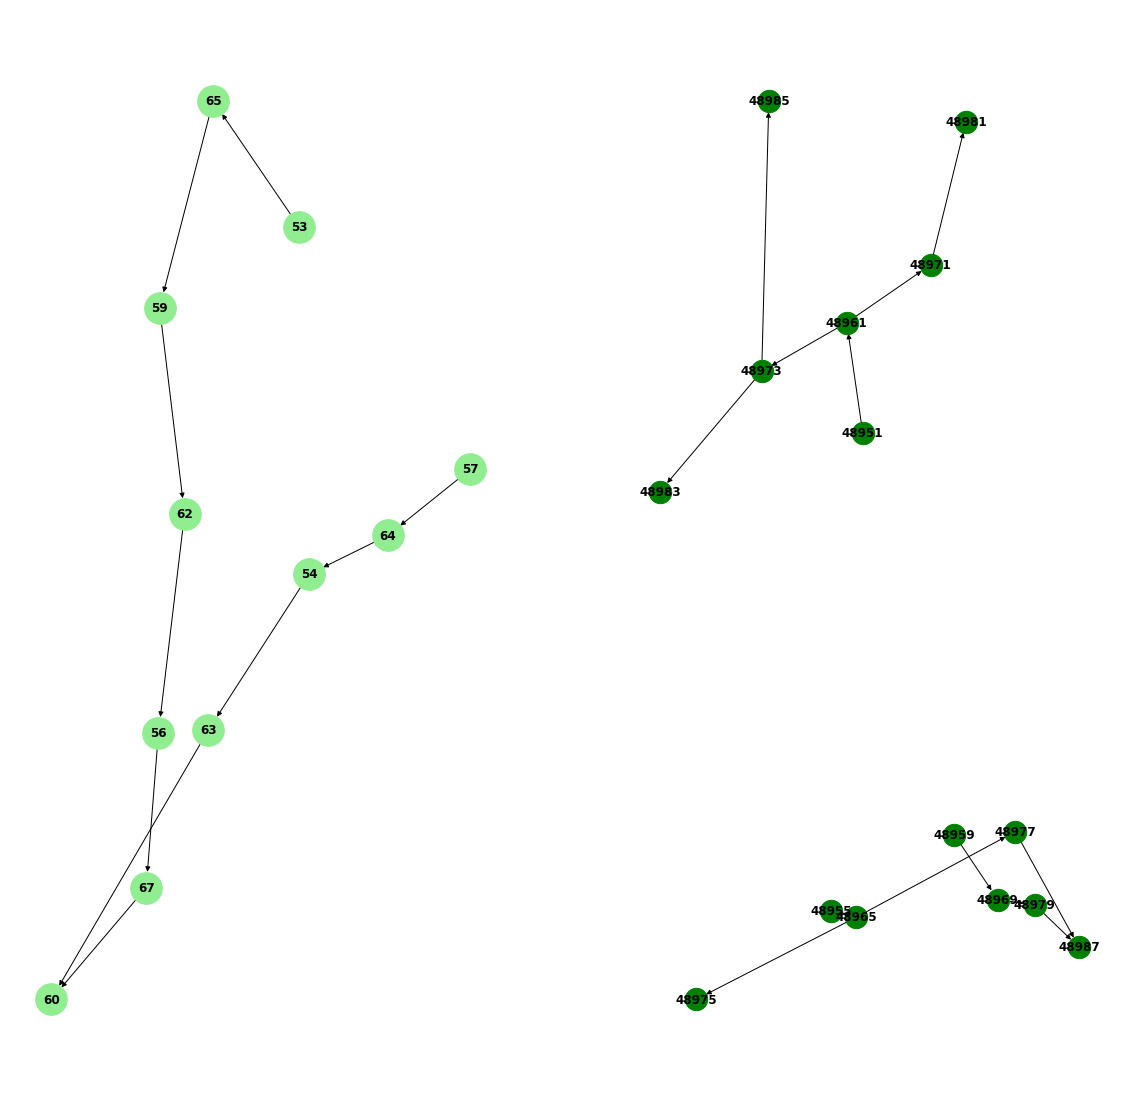

In [11]:
from GraphBasedDistanceMeasure import ScenarioGraph
from commonroad.common.file_reader import CommonRoadFileReader
import networkx as nx
import matplotlib.pyplot as plt

# generate path of the file to be opened
#file_path = "data_files/ZAM_Tutorial-1_1_T-1.xml"
#file_path2 = "data_files/ZAM_Tjunction-1_66_T-1.xml"
file_path = "data_files/CHN_Cho-2_1_T-1.xml"
file_path2 = "data_files/DEU_A9-1_1_T-1.xml"

# read in the scenario and planning problem set
crf = CommonRoadFileReader(file_path)
scenario, planning_problem_set = crf.open()

crf2 = CommonRoadFileReader(file_path2)
scenario2, planning_problem_set2 = crf2.open()

#for graph attributes
options1 = {
    'node_color': 'lightgreen',
    'node_size': 1000,
    'width': 1,
}

options2 = {
    'node_color': 'green',
    'node_size': 500,
    'width': 1,
}

plt.rcParams['figure.figsize'] = (20.0, 20.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

#################################BRIEF USAGE###############################################
###########################################################################################
#############################GBDM Sample Usage ############################################
###########################################################################################
#Creata an ScenariGraph object
SG_1 = ScenarioGraph(scenario, planning_problem_set)
SG_2 = ScenarioGraph(scenario2, planning_problem_set2)
#SG_1.CreateLaneletGraph()  #you dont need to create graph. It created in constructer method

plt.subplot(1, 2, 1)
nx.draw(SG_1.scenario_graph,with_labels=True, font_weight='bold', **options1)
plt.subplot(1, 2, 2)
nx.draw(SG_2.scenario_graph,with_labels=True, font_weight='bold', **options2)
plt.show()

In [12]:
###########################################################################################
############# Sample Usage of public attributes of ScenarioGraph  #########################
###########################################################################################
######### ego vehicle ids and obstacle ids of spesified scenario(SG_1)     ################
######### dictionary structure                                             ################
######### {<id_of_vehicle_obstacle: {    "id_of_vehicle_obstacle": id,     ################
#########                                "initial_position": position,     ################
#########                                "initial_lanelet_id": lanelet  }} ################
###########################################################################################
"""print(SG_1.ego_vehicle_ids)
print("_________________________________________________")
print(SG_1.ego_vehicles_dic)
print("_________________________________________________")
print(SG_1.obstacle_ids)
print("_________________________________________________")
print(SG_1.obstacles_dic)"""

'print(SG_1.ego_vehicle_ids)\nprint("_________________________________________________")\nprint(SG_1.ego_vehicles_dic)\nprint("_________________________________________________")\nprint(SG_1.obstacle_ids)\nprint("_________________________________________________")\nprint(SG_1.obstacles_dic)'

In [13]:
ov = SG_1.obstacle_ids + SG_1.ego_vehicle_ids
    
"""for k in ov:
    print("obstacle id: ", k)
    print((SG_1.V(k)))
"""

'for k in ov:\n    print("obstacle id: ", k)\n    print((SG_1.V(k)))\n'

In [14]:
vehicle_dict = {**SG_1.obstacles_dic, **SG_1.ego_vehicles_dic}
#print(vehicle_dict)

In [15]:
vehicle_dict = SG_1.all_cars_dict
for ky in vehicle_dict:
    print(vehicle_dict[ky]["initial_state"].velocity)
    print(vehicle_dict[ky]["initial_state"].position)

22.699
[ 67.348  377.2854]
16.3085
[-87.702  243.7694]
23.4588
[-130.5919  198.8162]
25.4455
[-97.9548 229.5944]
22.4416
[-22.8032 297.0531]
23.5856
[-66.1657 250.5458]
18.7462
[-34.8287 267.4852]
24.2938
[  8.049  324.4364]
21.9676
[ 30.674  324.2206]
19.6346
[-10.5665 284.8248]
25.36
[ 39.1096 352.1208]
21.5555
[ 18.23   308.4819]
22.4868
[ 59.0238 349.2613]
23.6817
[ 47.963  334.9498]
21.0765
[ 73.9127 357.5201]
18.8144
[ 94.6548 401.6375]
15.8235
[114.5878 421.2139]
11.3675
[134.6273 442.2464]
8.2769
[145.9309 454.1039]
5.2449
[153.7147 462.2688]


In [16]:
vehicle_dict = SG_1.all_cars_dict
print(vehicle_dict)

{-1: {'id': -1, 'initial_position': array([ 67.348 , 377.2854]), 'initial_state': <commonroad.scenario.trajectory.State object at 0x7faec7ad12d0>, 'initial_lanelet_id': 59, 'initial_lanelet_node': 0, 'planning_problem_id': 1}, 35: {'id': 35, 'initial_position': array([-87.702 , 243.7694]), 'initial_state': <commonroad.scenario.trajectory.State object at 0x7faec66d9b90>, 'initial_lanelet_id': 67, 'initial_lanelet_node': 3, 'planning_problem_id': -1}, 39: {'id': 39, 'initial_position': array([-130.5919,  198.8162]), 'initial_state': <commonroad.scenario.trajectory.State object at 0x7faec8226690>, 'initial_lanelet_id': 60, 'initial_lanelet_node': 5, 'planning_problem_id': -1}, 311: {'id': 311, 'initial_position': array([-97.9548, 229.5944]), 'initial_state': <commonroad.scenario.trajectory.State object at 0x7faec8236b90>, 'initial_lanelet_id': 60, 'initial_lanelet_node': 0, 'planning_problem_id': -1}, 313: {'id': 313, 'initial_position': array([-22.8032, 297.0531]), 'initial_state': <comm

In [17]:
SG_1.all_cars_current_state_dict

{35: {0: 67, 9: 60},
 39: {0: 60},
 311: {0: 60},
 313: {0: 62, 8: 56, 14: 67, 57: 60},
 315: {0: 63, 15: 60},
 317: {0: 64, 4: 54, 5: 63, 46: 60},
 318: {0: 59, 16: 62, 27: 56, 33: 67, 72: 60},
 319: {0: 57, 42: 64, 54: 63, 86: 67, 90: 60},
 320: {0: 57, 10: 64, 24: 63, 71: 60},
 321: {0: 59, 34: 62, 46: 56, 52: 67, 110: 60},
 322: {0: 57, 31: 64, 47: 63, 85: 60},
 323: {0: 57, 61: 64, 73: 63, 121: 67, 128: 60},
 324: {0: 57, 52: 64, 65: 63, 99: 60},
 326: {0: 57, 69: 64, 82: 63, 130: 60},
 327: {0: 65, 1: 59, 68: 62, 80: 56, 86: 67, 176: 60},
 328: {0: 53, 3: 65, 17: 59, 85: 62, 100: 56, 109: 67, 190: 60},
 329: {0: 53, 25: 65, 39: 59, 110: 62, 128: 56, 138: 67},
 330: {0: 53, 42: 65, 55: 59, 132: 62, 152: 56, 161: 67},
 331: {0: 53, 57: 65, 70: 59, 152: 62, 172: 56, 180: 67}}